## Reference
- https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
- https://stats.stackexchange.com/questions/206963/adaptive-variable-bandwidth-in-2d-gaussian-kernel-density-estimator-to-account


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mykde(X, h, x):
    density = np.zeros(len(X))
    for i in range(len(X)):
        density += np.exp(-(x-X[i])**2/(2*h**2))/(h*np.sqrt(2*np.pi))/len(X)
    return density

In [2]:
data_5_1 = np.random.normal(5, 1, 1000)
print(data_5_1[:10])

[4.60363471 5.67321027 3.16944732 5.33755233 5.5360527  4.56353349
 3.95710851 5.09577432 5.40132178 6.37171111]


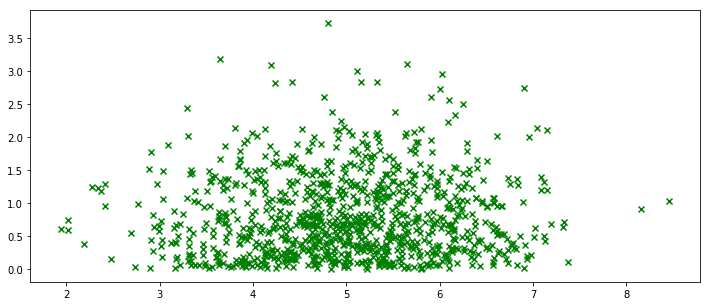

In [67]:
fig = plt.figure(figsize=(12, 5))

# Add an Axes to the figure as part of a subplot arrangement.
ax = fig.add_subplot(111)
ax.scatter(data_5_1,  np.abs(np.random.randn(1000)), color='green', marker='x', label="samples from N(5, 1)")

Text(0, 0.5, 'y-axis')

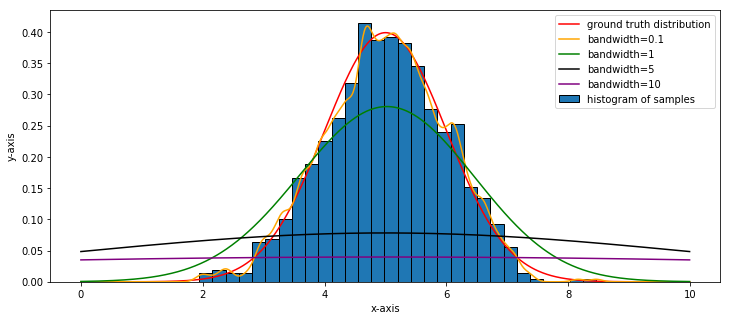

In [68]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.hist(data_5_1, bins=30, edgecolor='black', density=True, label='histogram of samples')
# Plot kernel function
x = np.arange(0, 10, 0.01)
y = normal(x, 5, 1)
d1 = mykde(data_5_1, 0.1, x)
d2 = mykde(data_5_1, 1, x)
d3 = mykde(data_5_1, 5, x)
d4 = mykde(data_5_1, 10, x)
# Plot the ground truth distribution and estimations
plt.plot(x, y, color='red', label='ground truth distribution')
ax.plot(x, d1, label='bandwidth=0.1', color='orange')
ax.plot(x, d2, label='bandwidth=1', color='green')
ax.plot(x, d3, label='bandwidth=5', color='black')
ax.plot(x, d4, label='bandwidth=10', color='purple')
    
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

Text(0, 0.5, 'y-axis')

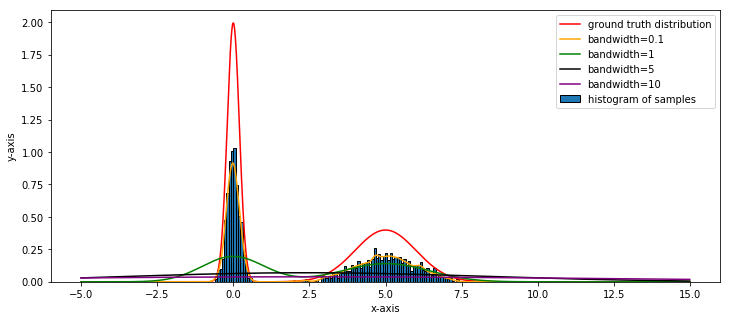

In [99]:
data_0_02 = np.random.normal(0, 0.2, 1000)
data_total = np.hstack((data_5_1, data_0_02))

# TODO: how many bins should I have?
fig = plt.figure(figsize=(12, 5))

# Add an Axes to the figure as part of a subplot arrangement.
ax = fig.add_subplot(111)

# Plot the histrogram
plt.hist(data_total, bins=120, edgecolor='black', density=True, label='histogram of samples')

# Plot kernel function
x = np.arange(-5, 15, 0.01)
y_1 = normal(x, 5, 1)
y_2 = normal(x, 0, 0.2)
y = y_1+y_2
d1 = mykde(data_total, 0.1, x)
d2 = mykde(data_total, 1, x)
d3 = mykde(data_total, 5, x)
d4 = mykde(data_total, 10, x)
# Plot the ground truth distribution
plt.plot(x, y, color='red', label='ground truth distribution')
ax.plot(x, d1, label='bandwidth=0.1', color='orange')
ax.plot(x, d2, label='bandwidth=1', color='green')
ax.plot(x, d3, label='bandwidth=5', color='black')
ax.plot(x, d4, label='bandwidth=10', color='purple')
    

plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [91]:
from sklearn.neighbors import KernelDensity

def mykde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

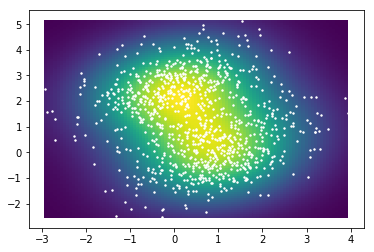

In [95]:
mul1, sigma1 = [1, 0], [[0.9, 0.4], [0.4, 0.9]]
mul2, sigma2 = [0, 2.5], [[0.9, 0.4], [0.4, 0.9]]
size = 500

data2D_1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
data2D_2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)
data2D = np.vstack([data2D_1, data2D_2])

data2D_x, data2D_y = data2D[:, 0], data2D[:, 1]
xx, yy, zz = mykde2D(data2D_x, data2D_y, 1.0)
plt.pcolormesh(xx, yy, zz)
plt.scatter(data2D[:, 0], data2D[:, 1], s=2, facecolor='white')

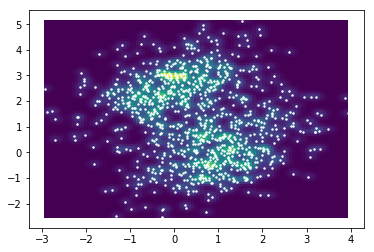

In [96]:
xx, yy, zz = mykde2D(data2D_x, data2D_y, 0.1)
plt.pcolormesh(xx, yy, zz)
plt.scatter(data2D[:, 0], data2D[:, 1], s=2, facecolor='white')

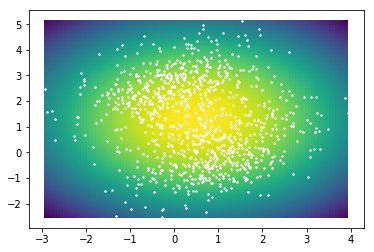

In [97]:
xx, yy, zz = mykde2D(data2D_x, data2D_y, 5)
plt.pcolormesh(xx, yy, zz)
plt.scatter(data2D[:, 0], data2D[:, 1], s=2, facecolor='white')

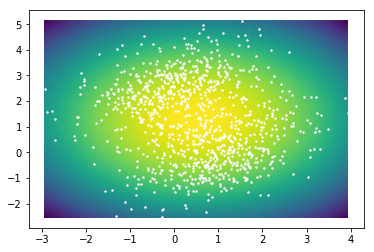

In [98]:
xx, yy, zz = mykde2D(data2D_x, data2D_y, 10)
plt.pcolormesh(xx, yy, zz)
plt.scatter(data2D[:, 0], data2D[:, 1], s=2, facecolor='white')